<a href="https://colab.research.google.com/github/Felipepa9/MADSI/blob/main/Secci%C3%B3n_1_MOD_SIST_INT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

In [2]:
%load_ext autoreload
%reload_ext autoreload
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")

In [4]:
data = pd.read_csv('/content/drive/MyDrive/MOD. Y SIST. INTELIGENTES/SECCION_1.csv')
data.head()

,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,RENTABILIDAD
0,800,15450,0,0
1,800,14740,0,0
2,800,15035,0,0
3,800,15240,0,0
4,800,16054,0,1


In [5]:
feature_names = data.columns[:3].tolist()
feature_names

['taxi_fuel_kg_qty', 'trip_fuel_kg_qty', 'extra_fuel_kg_qty']

In [6]:
data['TIPO_RENTAB'] = data['RENTABILIDAD'].map({
        0: 'alta',
        1: 'media',
        2: 'baja'
    })

data.head()

,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,RENTABILIDAD,TIPO_RENTAB
0,800,15450,0,0,alta
1,800,14740,0,0,alta
2,800,15035,0,0,alta
3,800,15240,0,0,alta
4,800,16054,0,1,media


In [7]:
feature_target = data['TIPO_RENTAB'].unique().tolist()
feature_target

['alta', 'media', 'baja']

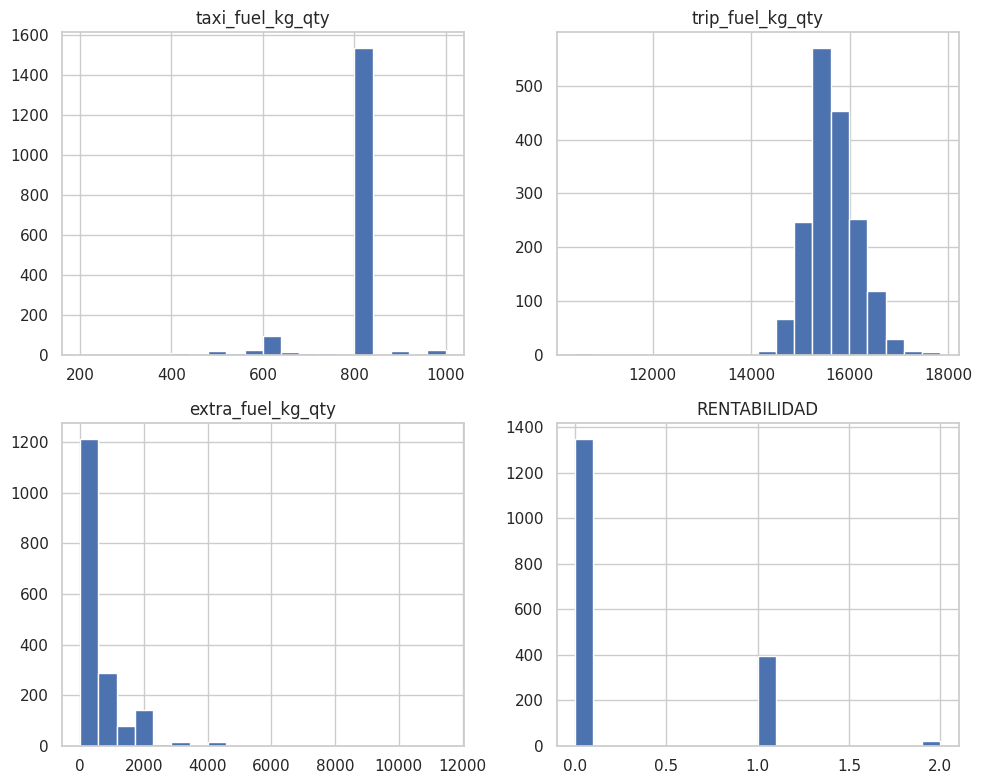

In [8]:
data.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [9]:
#Variables de entrada
taxi_fuel_kg_qty = ctrl.Antecedent(np.arange(200, 1000, 1), 'taxi_fuel_kg_qty')
trip_fuel_kg_qty = ctrl.Antecedent(np.arange(10000, 20000, 1), 'trip_fuel_kg_qty')
extra_fuel_kg_qty = ctrl.Antecedent(np.arange(0, 15000, 1), 'extra_fuel_kg_qty')

In [10]:
#Variable de salida
TIPO_RENTAB = ctrl.Consequent(np.arange(0, 2.1, 0.1), 'TIPO_RENTAB')

In [11]:
#Funciones de pertenencia
taxi_fuel_kg_qty['ajustado'] = fuzz.trimf(taxi_fuel_kg_qty.universe, [200,400,500])
taxi_fuel_kg_qty['moderado'] = fuzz.trimf(taxi_fuel_kg_qty.universe, [500,600,800])
taxi_fuel_kg_qty['excesivo'] = fuzz.trimf(taxi_fuel_kg_qty.universe, [600,1000,1000])

trip_fuel_kg_qty['ajustado'] = fuzz.trimf(trip_fuel_kg_qty.universe, [10000,16000,16999])
trip_fuel_kg_qty['moderado'] = fuzz.trimf(trip_fuel_kg_qty.universe, [16000,18000,18600])
trip_fuel_kg_qty['excesivo'] = fuzz.trimf(trip_fuel_kg_qty.universe, [18000,20000,20000])

extra_fuel_kg_qty['ajustado'] = fuzz.trimf(extra_fuel_kg_qty.universe, [0,200,300])
extra_fuel_kg_qty['moderado'] = fuzz.trimf(extra_fuel_kg_qty.universe, [300,3000,3500])
extra_fuel_kg_qty['excesivo'] = fuzz.trimf(extra_fuel_kg_qty.universe, [3500,15000,15000])

In [12]:
#Funciones de pertenencia para la variable de salida
TIPO_RENTAB['alta'] = fuzz.trimf(TIPO_RENTAB.universe, [0, 0, 0.5])    # Clase 0
TIPO_RENTAB['media'] = fuzz.trimf(TIPO_RENTAB.universe, [0.5, 1, 1.5]) # Clase 1
TIPO_RENTAB['baja'] = fuzz.trimf(TIPO_RENTAB.universe, [1.5, 2, 2])    # Clase 2

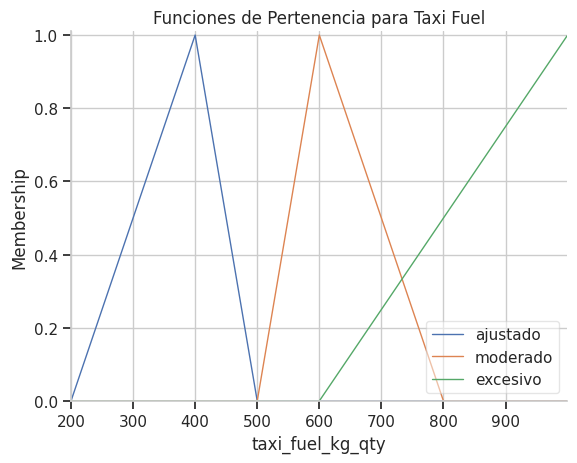

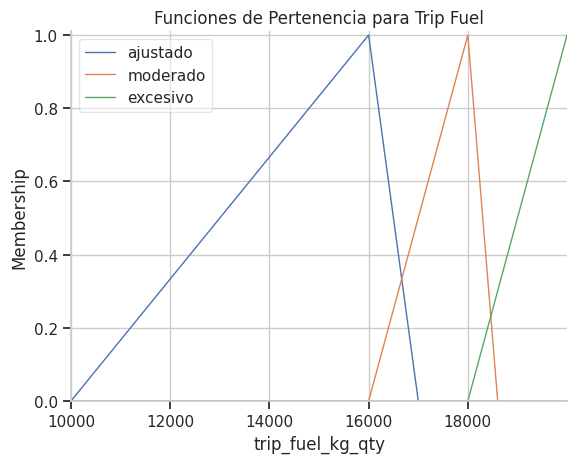

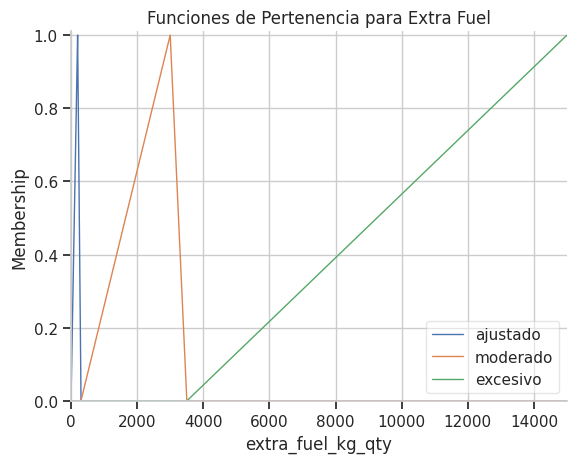

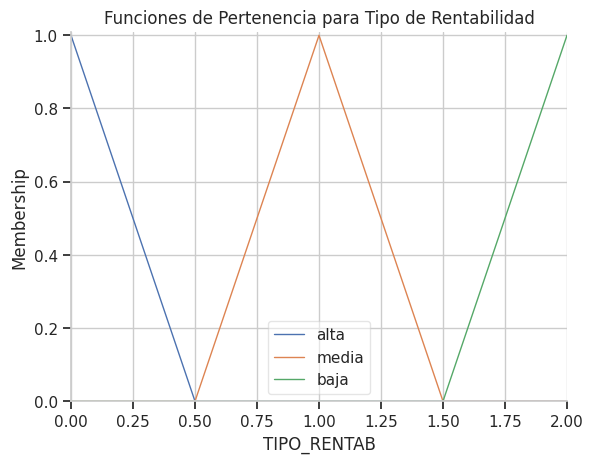

In [13]:
    taxi_fuel_kg_qty.view()
    plt.title("Funciones de Pertenencia para Taxi Fuel")
    plt.show()
    trip_fuel_kg_qty.view()
    plt.title("Funciones de Pertenencia para Trip Fuel")
    plt.show()
    extra_fuel_kg_qty.view()
    plt.title("Funciones de Pertenencia para Extra Fuel")
    plt.show()

    TIPO_RENTAB.view()
    plt.title("Funciones de Pertenencia para Tipo de Rentabilidad")
    plt.show()

In [14]:
    rule1 = ctrl.Rule(
        ( extra_fuel_kg_qty['excesivo']),
        TIPO_RENTAB['baja'])

    rule2 = ctrl.Rule(
        (extra_fuel_kg_qty['moderado'] | extra_fuel_kg_qty['ajustado']) &
        (trip_fuel_kg_qty['moderado']) &
        (taxi_fuel_kg_qty['ajustado'] | taxi_fuel_kg_qty['moderado'] | taxi_fuel_kg_qty['excesivo']  ),
        TIPO_RENTAB['media'])

    rule3 = ctrl.Rule(
        (extra_fuel_kg_qty['moderado'] | extra_fuel_kg_qty['ajustado']) &
        (trip_fuel_kg_qty['ajustado']) &
        (taxi_fuel_kg_qty['ajustado'] | taxi_fuel_kg_qty['moderado'] | taxi_fuel_kg_qty['excesivo']  ),
        TIPO_RENTAB['alta'])

    rule4 = ctrl.Rule(
        (extra_fuel_kg_qty['moderado'] | extra_fuel_kg_qty['ajustado']) &
        (trip_fuel_kg_qty['excesivo']) &
        (taxi_fuel_kg_qty['ajustado'] | taxi_fuel_kg_qty['moderado'] | taxi_fuel_kg_qty['excesivo']  ),
        TIPO_RENTAB['baja'])


In [15]:
    system = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
    simulator = ctrl.ControlSystemSimulation(system)

Tamaño del conjunto de entrenamiento: 1235 muestras
Tamaño del conjunto de prueba: 530 muestras

Muestra de Prueba 1:
Error al procesar la muestra 1: [  800 14346   806]. Error: index 3 is out of bounds for axis 0 with size 3

Muestra de Prueba 2:
Error al procesar la muestra 2: [  800 15134     0]. Error: index 3 is out of bounds for axis 0 with size 3

Muestra de Prueba 3:
Error al procesar la muestra 3: [  800 15509  2000]. Error: index 3 is out of bounds for axis 0 with size 3

Muestra de Prueba 4:
Error al procesar la muestra 4: [  800 15435     0]. Error: index 3 is out of bounds for axis 0 with size 3

Muestra de Prueba 5:
Error al procesar la muestra 5: [  800 15485  2026]. Error: index 3 is out of bounds for axis 0 with size 3

ADVERTENCIA: 10 muestras no pudieron ser clasificadas (ninguna regla activada).

Precisión del sistema fuzzy en el conjunto de prueba: 0.0000


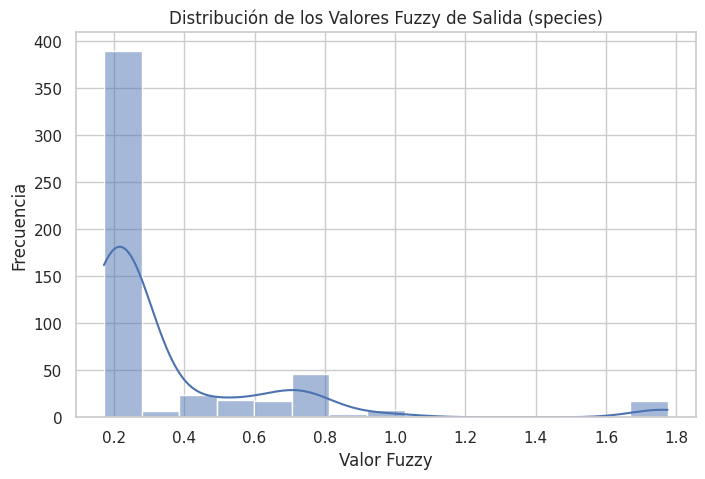

In [17]:
    X = data[feature_names].values
    y = data['TIPO_RENTAB'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
    print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

    predictions = []
    fuzzy_outputs = []

    for i, sample in enumerate(X_test):
        simulator.input['taxi_fuel_kg_qty'] = sample[0]
        simulator.input['trip_fuel_kg_qty'] = sample[1]
        simulator.input['extra_fuel_kg_qty'] = sample[2]

        try:
            simulator.compute()
            predicted_value = simulator.output['TIPO_RENTAB']
            fuzzy_outputs.append(predicted_value) # Guardar la salida fuzzy

            # Umbrales ajustados para la desfusificación a clases discretas
            if predicted_value <= 0.75: # Más inclinado hacia setosa
                predicted_class = 0
            elif predicted_value <= 1.75: # Más inclinado hacia versicolor
                predicted_class = 1
            else:
                predicted_class = 2
            predictions.append(predicted_class)


            if i < 5: # Mostrar detalles para las primeras 5 muestras
                print(f"\nMuestra de Prueba {i+1}:")
                print(f"  Características: SL={sample[0]}, SW={sample[1]}, PL={sample[2]}, PW={sample[3]}")
                print(f"  Clase Real: {feature_target[y_test[i]]} ({y_test[i]})")
                print(f"  Predicción: {feature_target[predicted_class]} ({predicted_class})")
                print(f"  Valor Fuzzy de Salida: {predicted_value:.4f}")

        except Exception as e: # Captura de errores más específica
            print(f"Error al procesar la muestra {i+1}: {sample}. Error: {e}")
            # Algunas entradas pueden no activar ninguna regla si las reglas son muy específicas
            # o si las funciones de pertenencia no cubren bien el espacio.
            # En estos casos, skfuzzy puede no devolver un output o dar error.
            predictions.append(-1) # Indicar error
            fuzzy_outputs.append(np.nan)

  # Asegurarse de que valid_indices solo contiene índices válidos
    # Esta es la línea clave que corrige el error
    valid_indices = [i for i, pred in enumerate(predictions) if pred != -1 and i < len(y_test)]

    if len(valid_indices) < len(predictions):
        print(f"\nADVERTENCIA: {len(predictions) - len(valid_indices)} muestras no pudieron ser clasificadas (ninguna regla activada).")

    valid_predictions = np.array(predictions)[valid_indices]
    valid_targets = y_test[valid_indices]

    if len(valid_predictions) > 0:
        accuracy = np.sum(valid_predictions == valid_targets) / len(valid_predictions)
        print(f"\nPrecisión del sistema fuzzy en el conjunto de prueba: {accuracy:.4f}")

        # Visualizar la distribución de las salidas fuzzy (opcional)
        plt.figure(figsize=(8, 5))
        sns.histplot(fuzzy_outputs, bins=15, kde=True)
        plt.title("Distribución de los Valores Fuzzy de Salida (species)")
        plt.xlabel("Valor Fuzzy")
        plt.ylabel("Frecuencia")
        plt.show()
    else:
        print("\nNo se pudieron obtener predicciones válidas para evaluar el sistema.")